# Noise_Resilience_CVX

In [1]:
import numpy as np
import cvxpy as cp
import sympy as sym
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors

In [2]:
train_data = pd.read_csv(r'data.csv', header=None)
train_data.columns=np.arange(train_data.shape[1])

RR = train_data/100
Phi = RR[60:120]
rho = 0.1/12; # `annualised' return of 10%
y = rho*np.ones(60);
x0 = np.zeros((48,1))
x0[0] = 1/2
x0[1] = 1/2
W = np.zeros((3,48))

for j in range(3):
    if j >= 1:
        Phi2 = Phi + 0.01*np.random.randn(60,48)
    else: 
        Phi2= Phi
    w = cp.Variable(48)
    cost = cp.sum_squares(Phi2.to_numpy() @ w - y)
    prob = cp.Problem(
                        cp.Minimize(cost),
                        [cp.sum(w) == 1,
                        w >= 0,]
                        )
    result = prob.solve()    
    W[j] = w.value
print(W[0][0:6])
print(W[1][0:6])
print(W[2][0:6])

[-1.93643152e-23  2.28290783e-23  3.37633902e-02  2.35437452e-23
  4.75845591e-02  4.83039637e-23]
[-7.17456222e-23 -5.43954579e-24  1.13496511e-02 -1.85598615e-23
  1.89638132e-01  1.12473918e-22]
[-9.90230538e-23  5.24376269e-23  1.47903020e-02  2.29223950e-23
  6.74298007e-03 -2.04673574e-23]


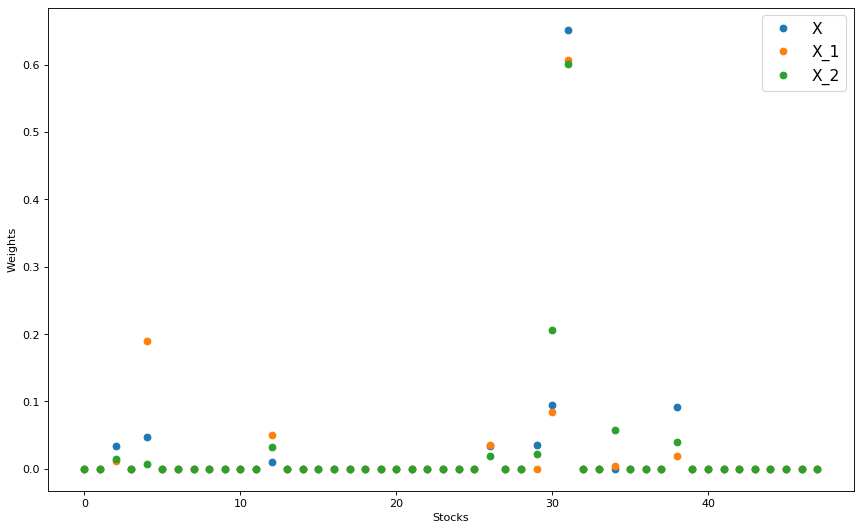

In [3]:
figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')

for j in range(3):
    w_current = W[j]
#     w_current[w_current == 0] = np.nan
    plt.plot(w_current, 'o')
    
legend = ['X', 'X_1', 'X_2']
plt.legend(legend ,prop={'size': 14})

plt.xlabel('Stocks')
plt.ylabel('Weights')

plt.show()